## 1. Load and Preview the Data in R
First, we import the tidyverse library, a collection of powerful tools for data analysis and visualization.

In [5]:
# Load necessary libraries
library(tidyverse) # metapackage of all tidyverse packages, includeing ggplot2, dplyr, and other useful packages

# Read the dataset
heart_data <- read.csv("../input/cleveland-heart-disease-dataset/heart.csv")

# Preview the first few rows
head(heart_data)

# Check the structure of the dataset
str(heart_data)

# Summary statistics
summary(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

## 2. Data Cleaning and Standardization
Just like in Python's pandas, in R, we can clean and standardize data using dplyr functions. <br>
"%>%" is  the pipe operator, commonly used in the tidyverse (especially in the dplyr and magrittr packages). It allows we to pass the result of one function directly into another function, making the code more readable and reducing the need for nested function calls.

In [6]:
# Convert categorical variables
heart_data <- heart_data %>%
  mutate(
    sex = factor(sex, labels = c("Female", "Male")), # Female = 0, Male = 1
    fbs = factor(fbs, labels = c("≤ 120 mg/dl", "> 120 mg/dl")), # ≤ 120 mg/dl = 0, > 120 mg/dl = 1
    exang = factor(exang, labels = c("No", "Yes")), # No = 0, Yes = 1
    cp = as.factor(cp),  # Chest pain type as categorical
    restecg = as.factor(restecg)  # ECG results as categorical
  )

# Handle missing values (if any)
heart_data <- heart_data %>%
  drop_na()  # Remove rows with missing values

# Preview the first few rows
head(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<int>,<int>
1,52,Male,0,125,212,≤ 120 mg/dl,1,168,No,1.0,2,2,3,0
2,53,Male,0,140,203,> 120 mg/dl,0,155,Yes,3.1,0,0,3,0
3,70,Male,0,145,174,≤ 120 mg/dl,1,125,Yes,2.6,0,0,3,0
4,61,Male,0,148,203,≤ 120 mg/dl,1,161,No,0.0,2,1,3,0
5,62,Female,0,138,294,> 120 mg/dl,1,106,No,1.9,1,3,2,0
6,58,Female,0,100,248,≤ 120 mg/dl,0,122,No,1.0,1,0,2,1


## 3. Exploratory Data Analysis (EDA)
#### 3-1. Check Class Distribution
- First, count the number of occurrences of each unique value in the sex column.
- Use ggplot to create a bar chart, setting sex as the x-axis and the count of occurrences (n) as the y-axis, and colour the bars based on the sex variable.
- Use the geom_bar() function to generate a bar chart, then enhance clarity by adding a title and axis labels. If the data is precomputed, set stat = "identity" in geom_bar() to use the existing counts

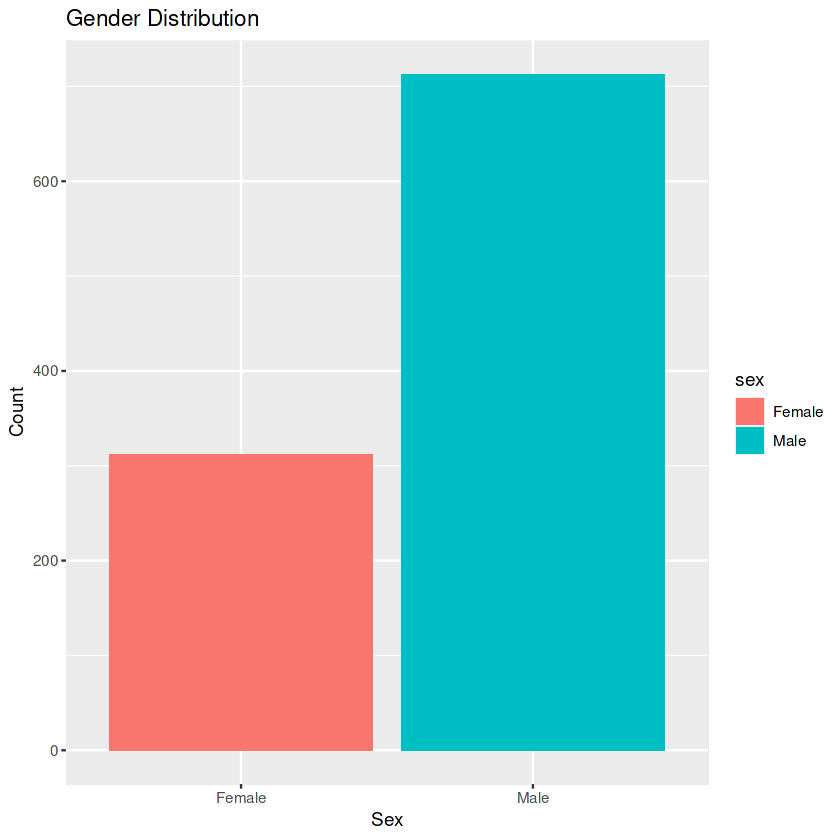

In [13]:
# Count of males vs. females
heart_data %>%
  count(sex) %>%
  ggplot(aes(x = sex, y = n, fill = sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Gender Distribution", x = "Sex", y = "Count")

#### 3-2. Boxplot: Age vs. Chest Pain Type
cp = 4 (Asymptomatic) actually means no chest pain, but the person may still have heart disease without symptoms.
Lower values (1 & 2): Indicate chest pain directly related to heart disease.
Higher values (3 & 4): Indicate non-cardiac or no pain, but still may have heart issues.

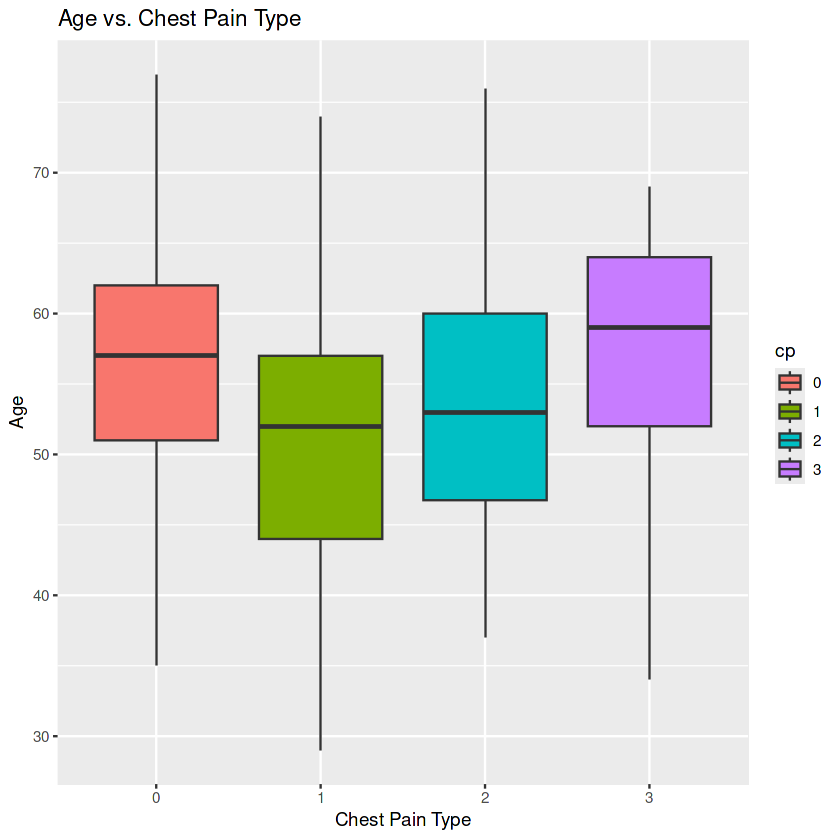

In [8]:
ggplot(heart_data, aes(x = cp, y = age, fill = cp)) +
  geom_boxplot() +
  labs(title = "Age vs. Chest Pain Type", x = "Chest Pain Type", y = "Age")

#### 3-3. Correlation Heatmap
It is just like Python’s Seaborn <br>
- Loads the corrplot package for visualizing correlations.
- Selects only numeric columns from heart_data since correlation analysis requires numerical data.
- Computes a correlation matrix, which measures relationships between numeric variables.
- Visualize correlation heatmap
  - corrplot() visualizes the correlation matrix using colored heatmaps.
  - method = "color": Colors indicate correlation strength.
  - tl.cex = 0.8: Adjusts text label size.

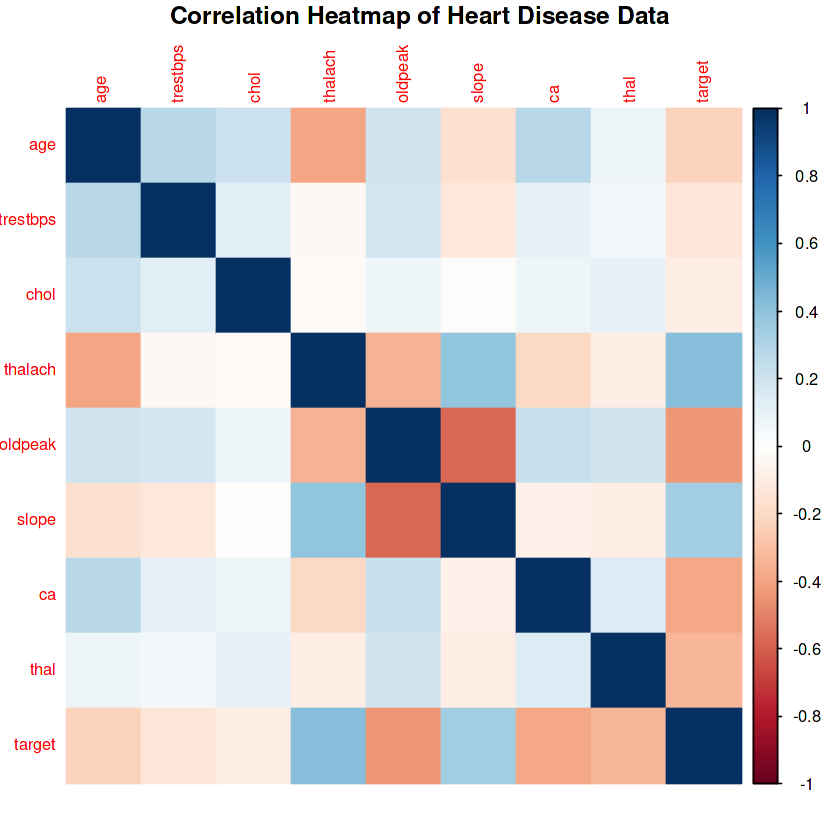

In [21]:
# Loads the package for visualizing correlations.
library(corrplot)

# Convert to numeric for correlation calculation
numeric_data <- heart_data %>% select_if(is.numeric)

# Compute correlation
cor_matrix <- cor(numeric_data)

# Set graphical parameters for title position
par(mar = c(1, 1, 3, 1))

# Define a custom color palette, use "col=" and put into the corrplot() function
my_colors <- colorRampPalette(c("blue", "white", "red"))(200)

# Visualize correlation heatmap
corrplot(cor_matrix, method = "color", tl.cex = 0.8)
title("Correlation Heatmap of Heart Disease Data", line = 2)


## 4. Standardize Numeric Features
When applying the scale() function, it standardizes the values in those columns so that they have a mean of 0 and a standard deviation of 1. This process centers the data by subtracting the mean and scales it by dividing by the standard deviation to ensure comparability, improve model performance, and reduce bias in models.

In [24]:
heart_data_scaled <- heart_data %>%
  mutate(across(c(age, trestbps, chol, thalach, oldpeak), scale))

# Check the first few rows of the scaled dataset
head(heart_data_scaled)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,"<dbl[,1]>",<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>",<fct>,<fct>,"<dbl[,1]>",<fct>,"<dbl[,1]>",<int>,<int>,<int>,<int>
1,-0.2683056,Male,0,-0.3774513,-0.65901038,≤ 120 mg/dl,1,0.8209198,No,-0.06085868,2,2,3,0
2,-0.1580799,Male,0,0.4788735,-0.83345431,> 120 mg/dl,0,0.2558430,Yes,1.72629436,0,0,3,0
3,1.7157579,Male,0,0.7643151,-1.39555140,≤ 120 mg/dl,1,-1.0481803,Yes,1.30078173,0,0,3,0
4,0.7237261,Male,0,0.9355801,-0.83345431,≤ 120 mg/dl,1,0.5166477,No,-0.91188394,2,1,3,0
5,0.8339519,Female,0,0.3646969,0.93036760,> 120 mg/dl,1,-1.8740617,No,0.70506405,1,3,2,0
6,0.3930489,Female,0,-1.8046593,0.03876532,≤ 120 mg/dl,0,-1.1785826,No,-0.06085868,1,0,2,1


## 5. Model Building 
Since the dataset has a target column indicating heart disease presence, we can build a logistic regression model.
- target: The dependent variable (binary response). For instance, it might indicate whether or not a person has heart disease (1 for yes, 0 for no).
- age, sex, cp, chol, thalach: The independent variables or predictors. These are factors believed to influence the target.
- family = "binomial": Since the target is binary, we use the binomial family, which is appropriate for logistic regression.
- data = heart_data: Specifies the dataset used for the analysis.

In [25]:
# Example: Predicting heart disease using logistic regression
model <- glm(target ~ age + sex + cp + chol + thalach, data = heart_data, family = "binomial")

# Model summary
summary(model)


Call:
glm(formula = target ~ age + sex + cp + chol + thalach, family = "binomial", 
    data = heart_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.918008   1.036208  -0.886 0.375655    
age         -0.036646   0.010584  -3.462 0.000536 ***
sexMale     -2.005256   0.205342  -9.765  < 2e-16 ***
cp1          2.227509   0.254648   8.747  < 2e-16 ***
cp2          2.152583   0.198802  10.828  < 2e-16 ***
cp3          1.880895   0.301828   6.232 4.61e-10 ***
chol        -0.007304   0.001653  -4.418 9.98e-06 ***
thalach      0.034086   0.004579   7.444 9.75e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1420.24  on 1024  degrees of freedom
Residual deviance:  916.38  on 1017  degrees of freedom
AIC: 932.38

Number of Fisher Scoring iterations: 5


#### Coefficients:
The table lists the coefficients (or estimates) for each variable and their statistical significance.

1. Intercept:

- Estimate: -0.918008
- This is the intercept term, or the log-odds of the outcome when all predictors are 0.
- z value: -0.886, Pr(>|z|): 0.375655 — The intercept is not statistically significant because the p-value is large (greater than 0.05).
  
2. age:
  
- Estimate: -0.036646
- This suggests that for each year increase in age, the odds of the event happening (e.g., heart disease) decrease by approximately 3.7%.
- z value: -3.462, Pr(>|z|): 0.000536 — This is statistically significant (p-value < 0.001), meaning age is a significant predictor.

3. sexMale:

- Estimate: -2.005256
- Being male reduces the odds of the outcome (e.g., heart disease) by a factor of 2. This is indicated by the negative coefficient.
- z value: -9.765, Pr(>|z|): < 2e-16 — The result is highly statistically significant (p-value < 0.001), meaning sex is a very strong predictor.

4. cp1, cp2, cp3 (chest pain types):

- Estimate:
  - cp1: 2.227509
  - cp2: 2.152583
  - cp3: 1.880895
- These values represent the log-odds of the outcome when a person has different types of chest pain. Positive values suggest a higher likelihood of the outcome. For instance, cp1 increases the odds of the target event by a factor of 2.2.
z values and p-values: All are highly significant (p-value < 0.001), suggesting that chest pain type is an important factor for predicting the outcome.

5. chol (serum cholesterol):

- Estimate: -0.007304
- For each unit increase in cholesterol level, the odds of the target event (e.g., heart disease) decreases by approximately 0.7%.
- z value: -4.418, Pr(>|z|): 9.98e-06 — This is statistically significant (p-value < 0.001), meaning cholesterol is an important predictor.

6. thalach (maximum heart rate):

- Estimate: 0.034086
- For each unit increase in the maximum heart rate, the odds of the event happening increase by 3.4%.
- z value: 7.444, Pr(>|z|): 9.75e-14 — This is statistically significant (p-value < 0.001), suggesting that maximum heart rate is a strong predictor.

#### Model Statistics:
- Null deviance: 1420.24
  - The deviance is a measure of how well the model fits the data. The null deviance refers to a model with no predictors (only an intercept). It shows the goodness of fit of the simpler model.

- Residual deviance: 916.38
  - The residual deviance represents the goodness of fit for the model with predictors. The lower the deviance, the better the model fits the data.

- Degrees of freedom:
  - Null deviance on 1024 degrees of freedom: Number of data points minus 1.
  - Residual deviance on 1017 degrees of freedom: Number of data points minus the number of parameters (predictors) in the model.

- AIC (Akaike Information Criterion): 932.38
  - This is a measure of the model's quality, balancing goodness of fit and complexity (penalizing for adding more parameters). Lower AIC values indicate a better model.

- Number of Fisher Scoring iterations: 5
   - Fisher scoring is an iterative method used for optimizing the log-likelihood function. This indicates that 5 iterations were required to converge to a solution.